# Heart Disease EDA Assignment

In [1]:
# Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load dataset
data = pd.read_csv('dataset_heart.csv')


In [3]:
# Show 1st 10 data
data.head(10)

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,1
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,2
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,2
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,2
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,2


In [4]:
# Count Numuber of rows and columns
data.shape

(270, 14)

In [5]:
# Check Datatypes of columns
data.dtypes

age                                       int64
sex                                       int64
chest pain type                           int64
resting blood pressure                    int64
serum cholestoral                         int64
fasting blood sugar                       int64
resting electrocardiographic results      int64
max heart rate                            int64
exercise induced angina                   int64
oldpeak                                 float64
ST segment                                int64
major vessels                             int64
thal                                      int64
heart disease                             int64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   270 non-null    int64  
 1   sex                                   270 non-null    int64  
 2   chest pain type                       270 non-null    int64  
 3   resting blood pressure                270 non-null    int64  
 4   serum cholestoral                     270 non-null    int64  
 5   fasting blood sugar                   270 non-null    int64  
 6   resting electrocardiographic results  270 non-null    int64  
 7   max heart rate                        270 non-null    int64  
 8   exercise induced angina               270 non-null    int64  
 9   oldpeak                               270 non-null    float64
 10  ST segment                            270 non-null    int64  
 11  major vessels      

## Findings

From the above we found the following:

* The dataset contains 270 records and 14 features.
* All the features in the dataset are numerical.
* The dataset doesn't have any missing value.
* Most of the features have complex names so they needs to be renamed.


In [7]:
# Rename the features having long and complex names
renamed_features = {
    "sex ": "sex",
    "chest pain type": "chest_pain",
    "resting blood pressure": "resting_bp",
    "serum cholestoral": "cholestoral",
    "fasting blood sugar": "sugar",
    "resting electrocardiographic results": "electrocardiographic",
    "max heart rate": "max_heart_rate",
    "exercise induced angina": "angina",
    "ST segment": "st_segment",
    "major vessels": "major_vessels",
    "heart disease": "heart_disease"
}
data_cleaned1 = data.rename(renamed_features, axis= 1)

In [8]:
data_cleaned1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   270 non-null    int64  
 1   sex                   270 non-null    int64  
 2   chest_pain            270 non-null    int64  
 3   resting_bp            270 non-null    int64  
 4   cholestoral           270 non-null    int64  
 5   sugar                 270 non-null    int64  
 6   electrocardiographic  270 non-null    int64  
 7   max_heart_rate        270 non-null    int64  
 8   angina                270 non-null    int64  
 9   oldpeak               270 non-null    float64
 10  st_segment            270 non-null    int64  
 11  major_vessels         270 non-null    int64  
 12  thal                  270 non-null    int64  
 13  heart_disease         270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


In [9]:
# Find Duplicate
data_cleaned1[data_cleaned1.duplicated].shape

(0, 14)

## Finding

No duplicate record found in the dataset.

In [10]:
# Count number of record has heart disesse
data_cleaned1["heart_disease"].value_counts()

heart_disease
1    150
2    120
Name: count, dtype: int64

## Findings

Out of 270 patients we found presence of heart disease in 120 patients.

## Univariate Analysis

In [45]:
def univariate_analysis(df, col):
  # Find statistical information
  info = df[col].describe()
  result = dict(info)
  print(result)
  result['col'] = col
  # Find presence of outliers
  iqr = result['75%'] - result['25%']
  le = result['25%'] - 1.5 * iqr
  ue = result['75%'] + 1.5 * iqr
  has_outlier = 'No'
  outliers = []
  for x in df[col]:
    if x < le or x > ue:
      has_outlier = 'Yes'
      outliers.append(x)
  result['has_outlier'] = has_outlier
  result['outliers'] = outliers

  # Check Distribution using Histogram
  plt.figure(figsize=(10, 5))
  df[col].hist()
  plt.title(col + ' Distribution')
  plt.xlabel(col)
  plt.ylabel('frequency')
  plt.show()

  # Check distribution using Box Plot
  plt.figure(figsize=(10, 3))
  sns.boxplot(df[col], orient='h')
  plt.title(col)
  plt.show()
  return result

{'count': 270.0, 'mean': 54.43333333333333, 'std': 9.109066523898207, 'min': 29.0, '25%': 48.0, '50%': 55.0, '75%': 61.0, 'max': 77.0}


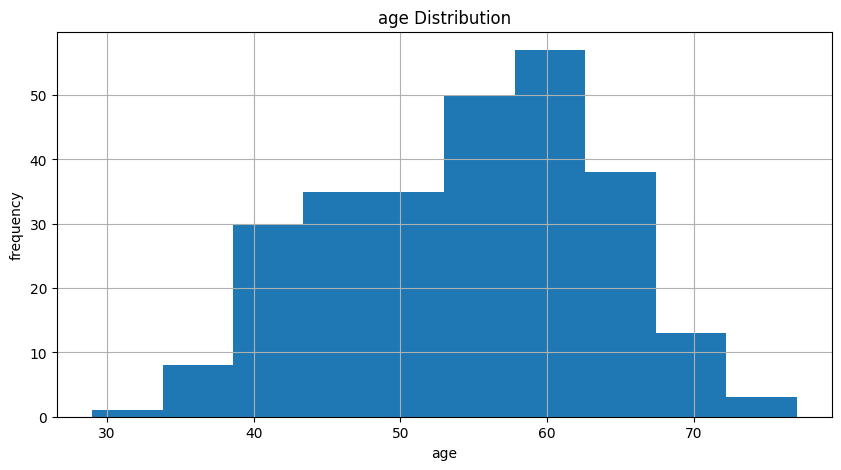

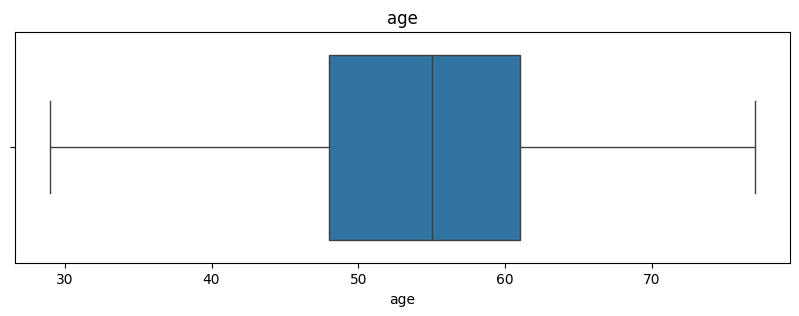

{'count': 270.0, 'mean': 131.34444444444443, 'std': 17.861608292800856, 'min': 94.0, '25%': 120.0, '50%': 130.0, '75%': 140.0, 'max': 200.0}


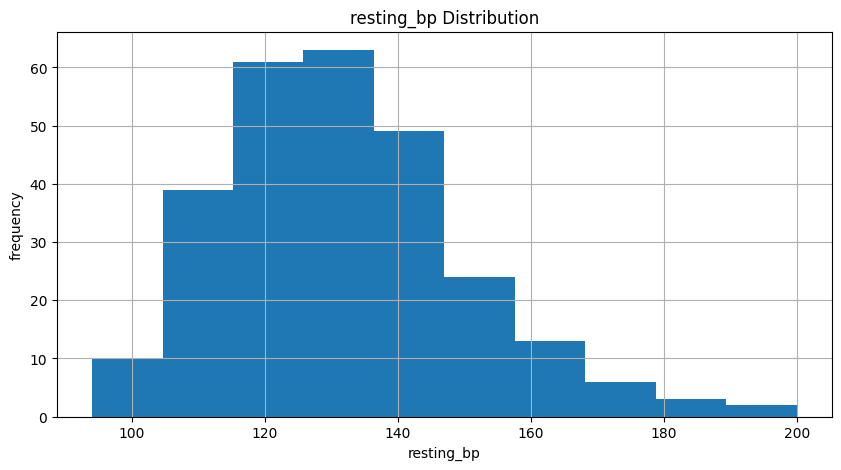

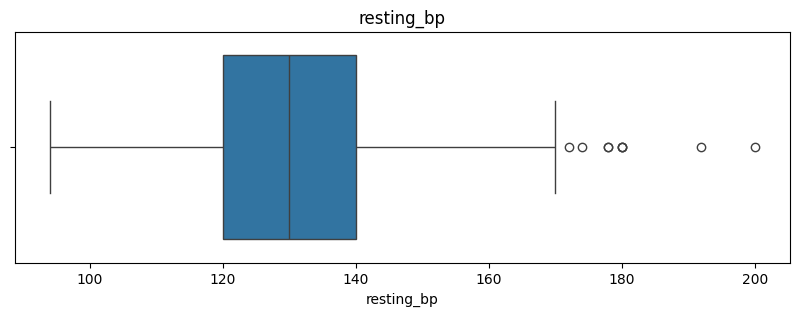

{'count': 270.0, 'mean': 249.65925925925927, 'std': 51.68623711643124, 'min': 126.0, '25%': 213.0, '50%': 245.0, '75%': 280.0, 'max': 564.0}


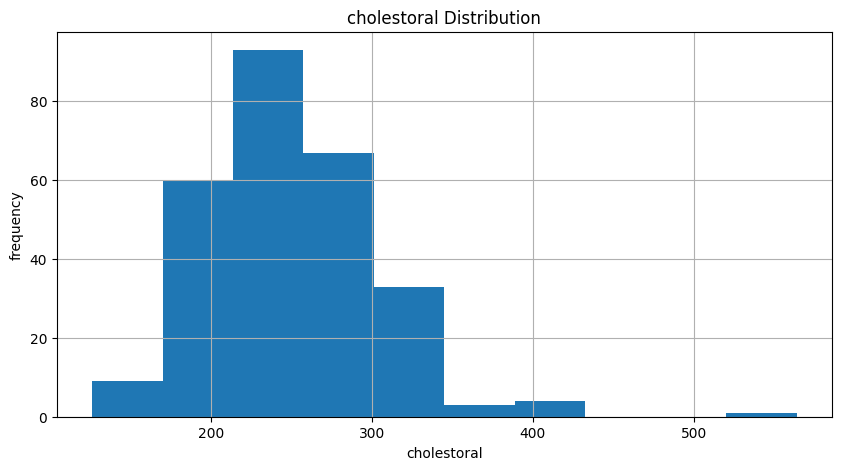

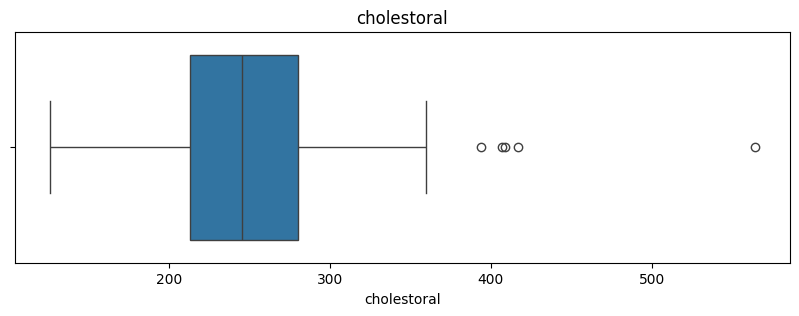

{'count': 270.0, 'mean': 149.67777777777778, 'std': 23.165716775120096, 'min': 71.0, '25%': 133.0, '50%': 153.5, '75%': 166.0, 'max': 202.0}


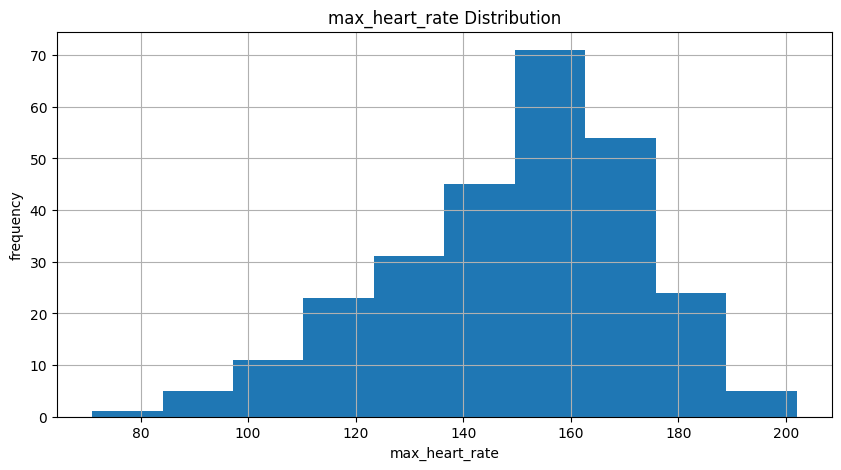

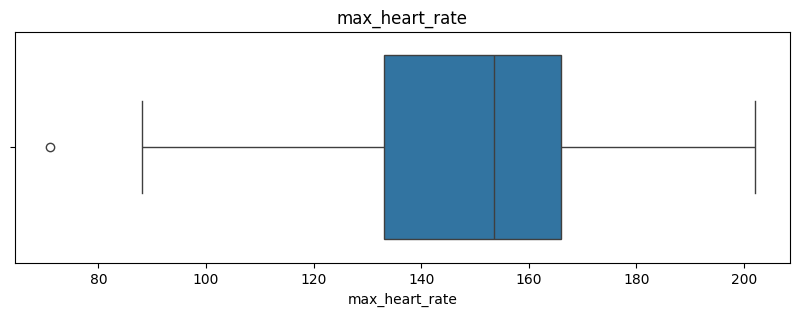

{'count': 270.0, 'mean': 1.05, 'std': 1.1452098393779973, 'min': 0.0, '25%': 0.0, '50%': 0.8, '75%': 1.6, 'max': 6.2}


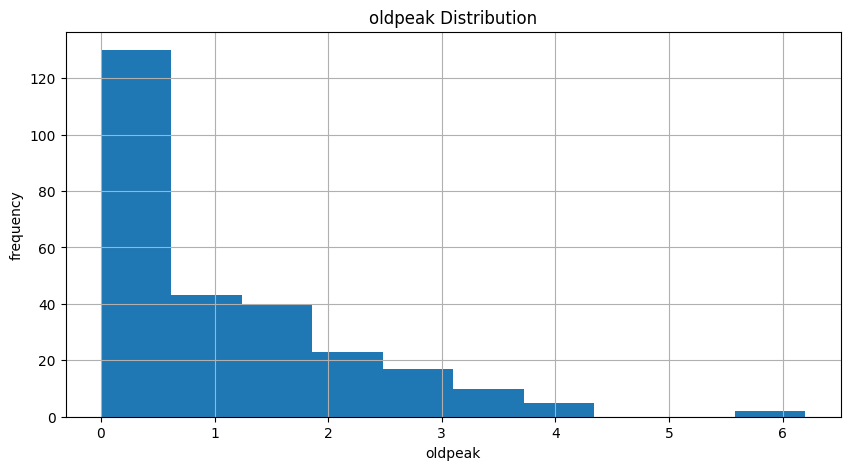

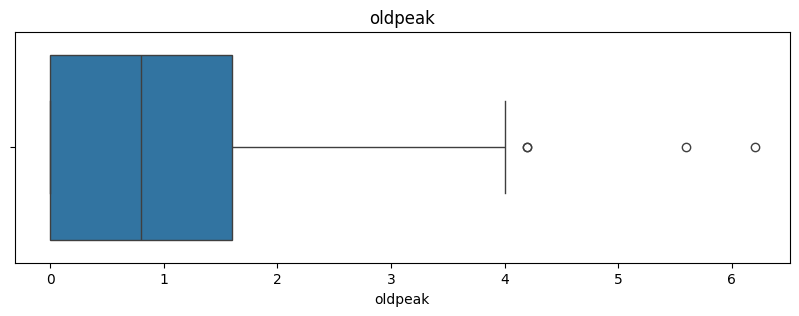

In [48]:
cols = ['age', 'resting_bp', 'cholestoral', 'max_heart_rate', 'oldpeak']
# cols = ['age']
analysis_result = []
for col in cols:
  result = univariate_analysis(data_cleaned1, col)
  analysis_result.append(result)

## Findings



In [49]:
# Print the findings
for result in analysis_result:
  print(f"We found the following statistics about {result['col']}: \n")
  print(f"50% of {result['col']} lies between {result['25%']} and {result['75%']}")
  print(f"25% of {result['col']} lies between {result['min']} - {result['25%']} and {result['75%']} - {result['max']}")
  print(f"Average {result['col']} of patient is {result['mean']:.2f}")
  print(f"Median {result['col']} of patient is {result['50%']:.2f}")
  print(f"Standard Deviation {result['col']} of patient is {result['std']:.2f}")
  print(f"Presence of outliers in {result['col']}: {result['has_outlier']}")
  if result['has_outlier'] == 'Yes':
    print(f"Outliers: {result['outliers']}")
  print("\n")

We found the following statistics about age: 

50% of age lies between 48.0 and 61.0
25% of age lies between 29.0 - 48.0 and 61.0 - 77.0
Average age of patient is 54.43
Median age of patient is 55.00
Standard Deviation age of patient is 9.11
Presence of outliers in age: No


We found the following statistics about resting_bp: 

50% of resting_bp lies between 120.0 and 140.0
25% of resting_bp lies between 94.0 - 120.0 and 140.0 - 200.0
Average resting_bp of patient is 131.34
Median resting_bp of patient is 130.00
Standard Deviation resting_bp of patient is 17.86
Presence of outliers in resting_bp: Yes
Outliers: [174, 178, 180, 200, 192, 178, 180, 180, 172]


We found the following statistics about cholestoral: 

50% of cholestoral lies between 213.0 and 280.0
25% of cholestoral lies between 126.0 - 213.0 and 280.0 - 564.0
Average cholestoral of patient is 249.66
Median cholestoral of patient is 245.00
Standard Deviation cholestoral of patient is 51.69
Presence of outliers in cholestoral

## Bivariate Analysis

Text(0, 0.5, 'Frequency')

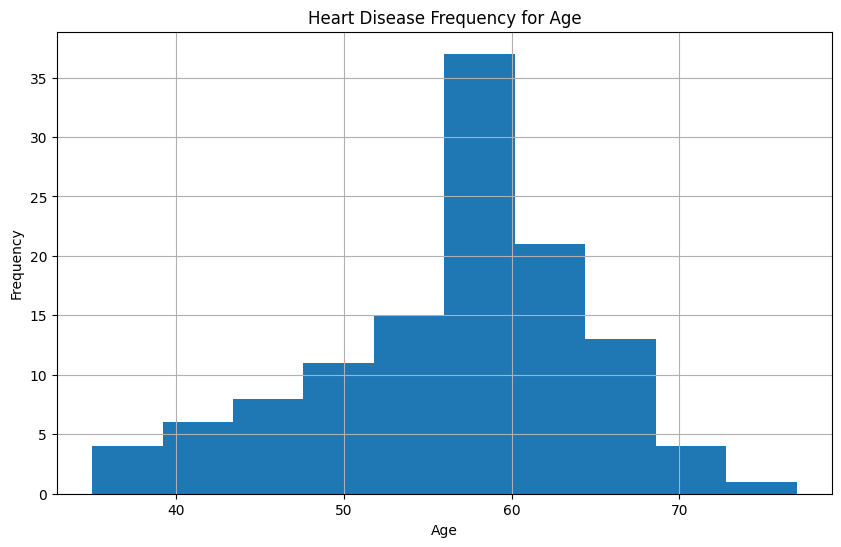

In [14]:
# Age Vs Heart Disesse
plt.figure(figsize=(10, 6))
data_cleaned1[data_cleaned1['heart_disease'] == 2]['age'].hist(bins=10)
plt.title("Heart Disease Frequency for Age")
plt.xlabel("Age")
plt.ylabel("Frequency")


## Findings

> Most of the heart disease found at the age ranges 55 to 65 years

In [15]:
pd.crosstab(data_cleaned1['sex'], data_cleaned1["heart_disease"])

heart_disease,1,2
sex,,
0,67,20
1,83,100


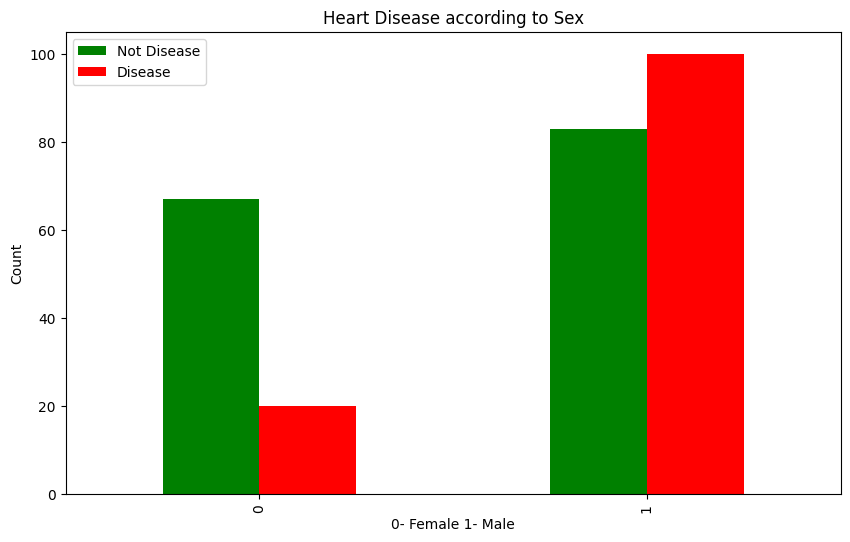

In [16]:
# Gender Vs Heart Disease
pd.crosstab(data_cleaned1['sex'], data_cleaned1["heart_disease"]).plot(kind="bar", figsize=(10,6), color=[ "green", "red"])
plt.title("Heart Disease according to Sex")
plt.xlabel('0- Female 1- Male')
plt.ylabel("Count")
plt.legend(['Not Disease', 'Disease'])

## Findings

* Out of 183 Male patients heart disease found in 100 males.
* Out of 87 Female patients heart disease found in 20 females.

In [17]:
pd.crosstab(data_cleaned1["chest_pain"], data_cleaned1["heart_disease"])

heart_disease,1,2
chest_pain,,
1,15,5
2,35,7
3,62,17
4,38,91


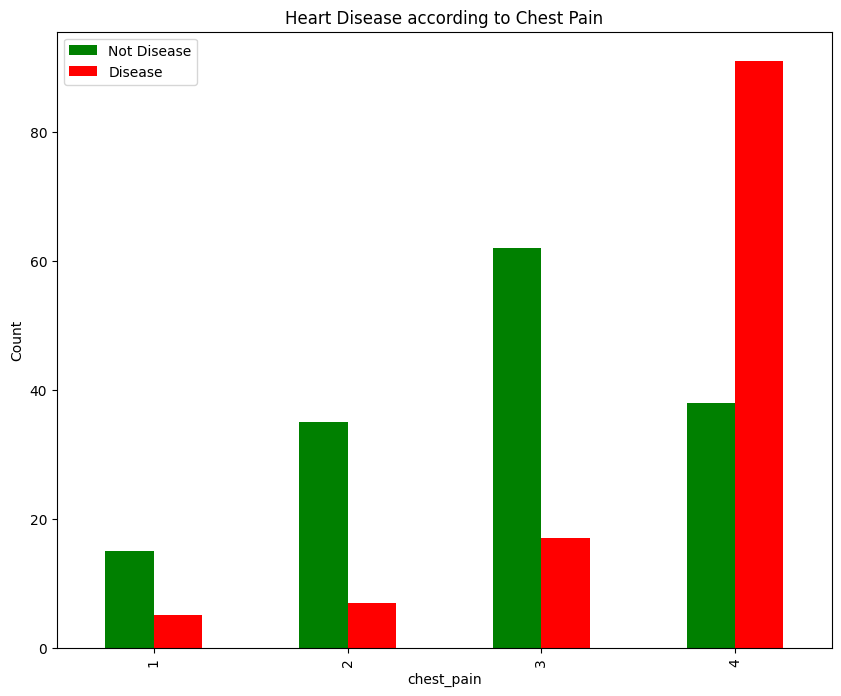

In [18]:
# Chest Pain Vs Heart Disease
pd.crosstab(data_cleaned1["chest_pain"], data_cleaned1["heart_disease"]).plot(kind="bar", figsize=(10, 8), color=["green", "red"])
plt.title("Heart Disease according to Chest Pain")
plt.ylabel("Count")
plt.legend(["Not Disease", "Disease"])

## Findings

> Maximum Heart disease found in the patients having chest pain type 4.

Text(0, 0.5, 'Frequency')

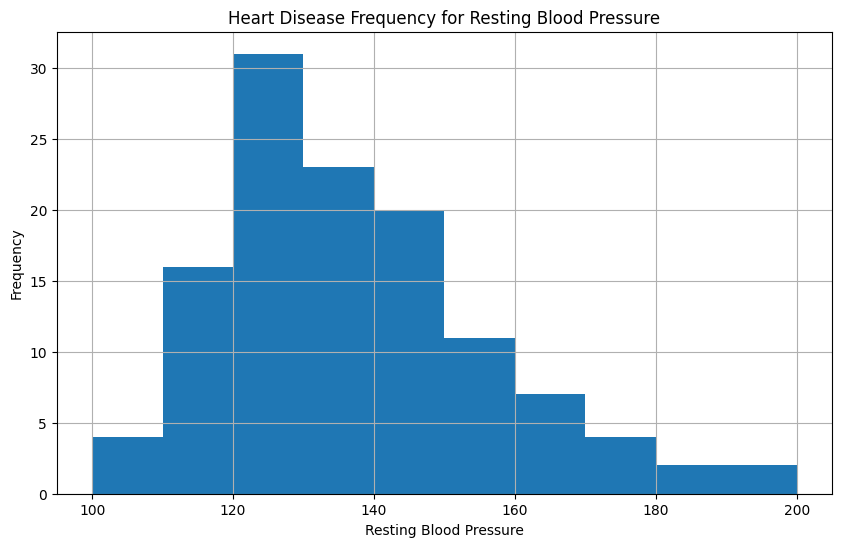

In [19]:
# Resting Blood Pressure Vs Heart Disease
plt.figure(figsize=(10,6))
data_cleaned1[data_cleaned1['heart_disease'] == 2]["resting_bp"].hist()
plt.title("Heart Disease Frequency for Resting Blood Pressure")
plt.xlabel("Resting Blood Pressure")
plt.ylabel("Frequency")

## Findings

> Heart disease mostly having resting blood pressure in the range 110 to 150

Text(0, 0.5, 'Frequency')

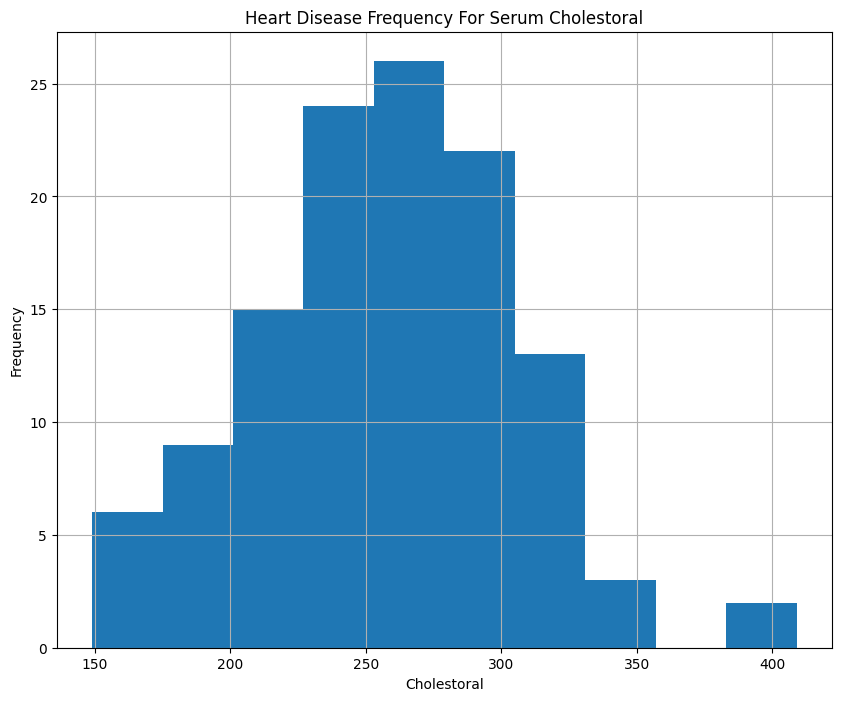

In [20]:
# Cholestoral Vs Heart Disease
plt.figure(figsize=(10,8))
data_cleaned1[data_cleaned1['heart_disease'] == 2]["cholestoral"].hist()
plt.title("Heart Disease Frequency For Serum Cholestoral")
plt.xlabel("Cholestoral")
plt.ylabel("Frequency")

## Findings

> Heart disease found mostly if cholestoral level is more than 200

In [21]:
# Blood Sugar Vs Heart Disease
pd.crosstab(data_cleaned1["sugar"], data_cleaned1["heart_disease"])

heart_disease,1,2
sugar,,
0,127,103
1,23,17


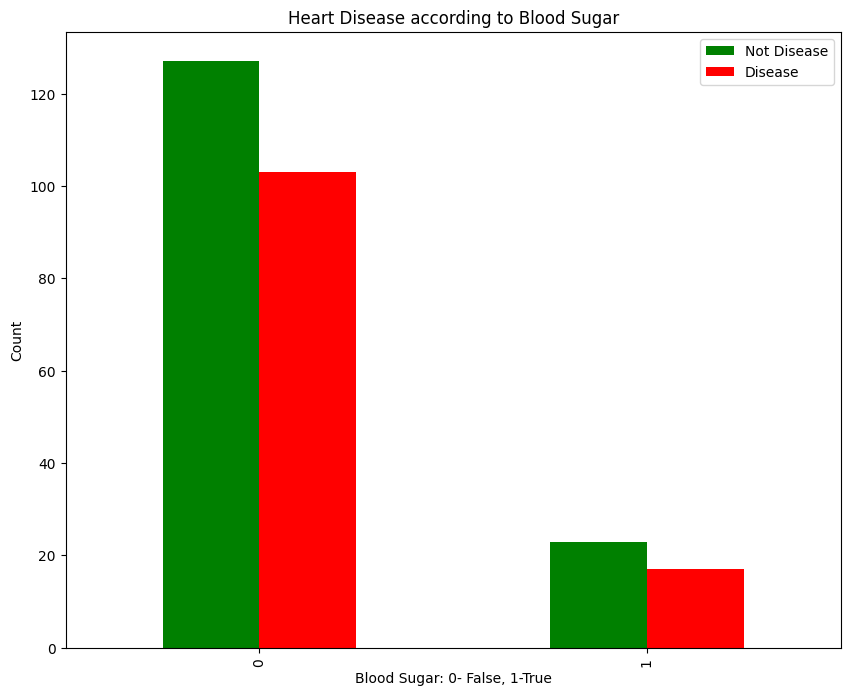

In [22]:
pd.crosstab(data_cleaned1["sugar"], data_cleaned1["heart_disease"]).plot(kind="bar", figsize=(10, 8), color=["green", "red"])
plt.title("Heart Disease according to Blood Sugar")
plt.xlabel("Blood Sugar: 0- False, 1-True")
plt.ylabel("Count")
plt.legend(["Not Disease", "Disease"])

## Findings

* Out of 230 patients not having blood sugar 103 patients have heart disease.
* Out of 40 patients having blood sugar 17 patients have heart disease.

In [23]:
# Resting electrocardiographic results Vs Heart Disease
pd.crosstab(data_cleaned1["electrocardiographic"], data_cleaned1["heart_disease"])

heart_disease,1,2
electrocardiographic,,
0,85,46
1,1,1
2,64,73


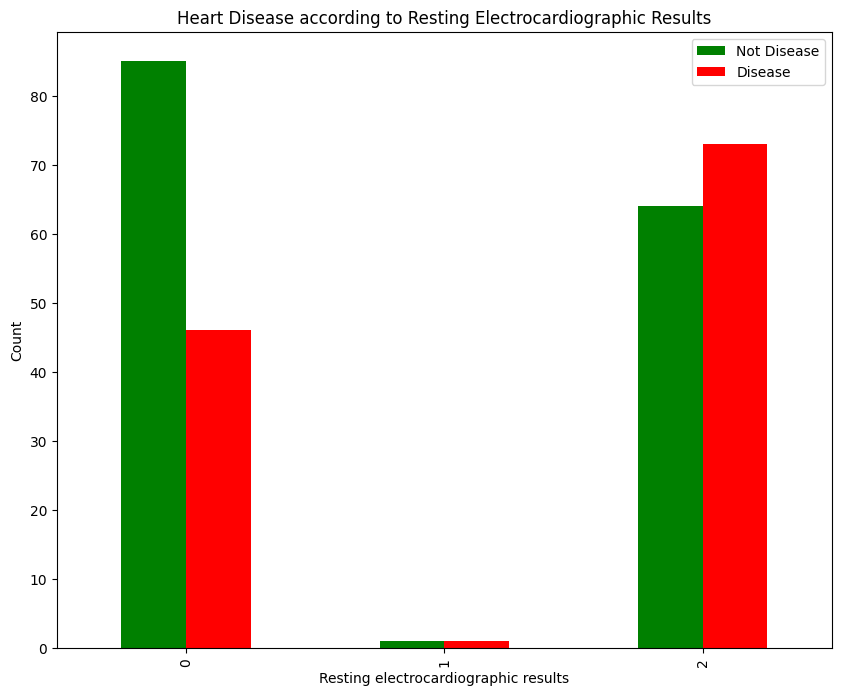

In [24]:
pd.crosstab(data_cleaned1["electrocardiographic"], data_cleaned1["heart_disease"]).plot(kind="bar", figsize=(10, 8), color=["green", "red"])
plt.title("Heart Disease according to Resting Electrocardiographic Results")
plt.xlabel("Resting electrocardiographic results")
plt.ylabel("Count")
plt.legend(["Not Disease", "Disease"])

## Findings

* Heart disease found mostly if the resting electrocardiographic results is 2 i.e 73 out of 137
* For the 1 value only 1 patient is present and the patient has heart disease.
* For the value 0 the presence of heart disease is comparetively low i.e 46 out of 131.

Text(0, 0.5, 'Frequency')

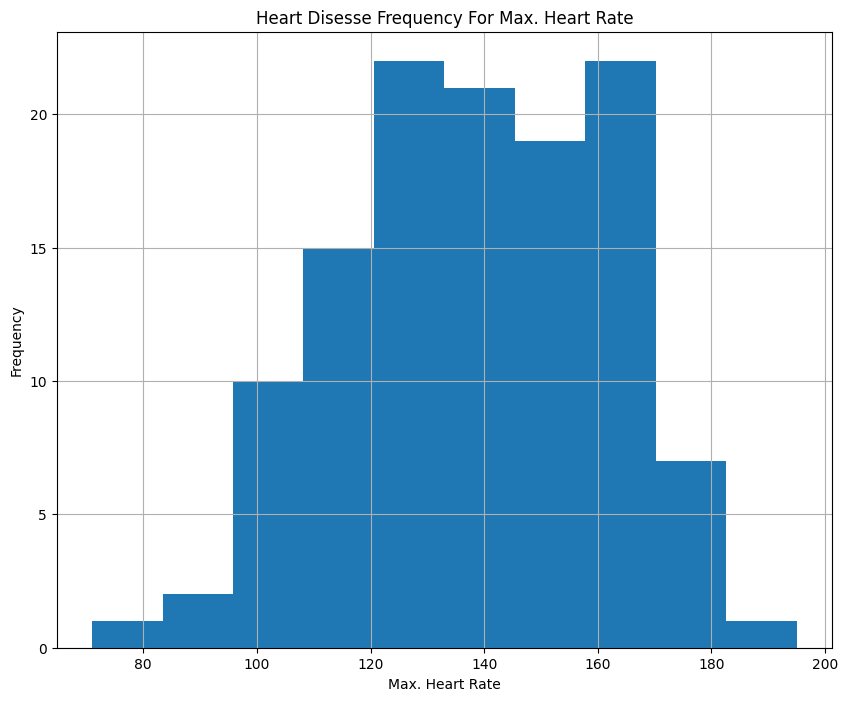

In [25]:
# Max Heart Rate Vs. Heart Disease
plt.figure(figsize=(10,8))
data_cleaned1[data_cleaned1["heart_disease"] == 2]["max_heart_rate"].hist()
plt.title("Heart Disesse Frequency For Max. Heart Rate")
plt.xlabel("Max. Heart Rate")
plt.ylabel("Frequency")

## Findings

> Heart Disease found mostly in patients having max. heart rate 100 - 180

In [26]:
# Exercise Induced Angina Vs. Heart Disease
pd.crosstab(data_cleaned1["angina"], data_cleaned1["heart_disease"])

heart_disease,1,2
angina,,
0,127,54
1,23,66


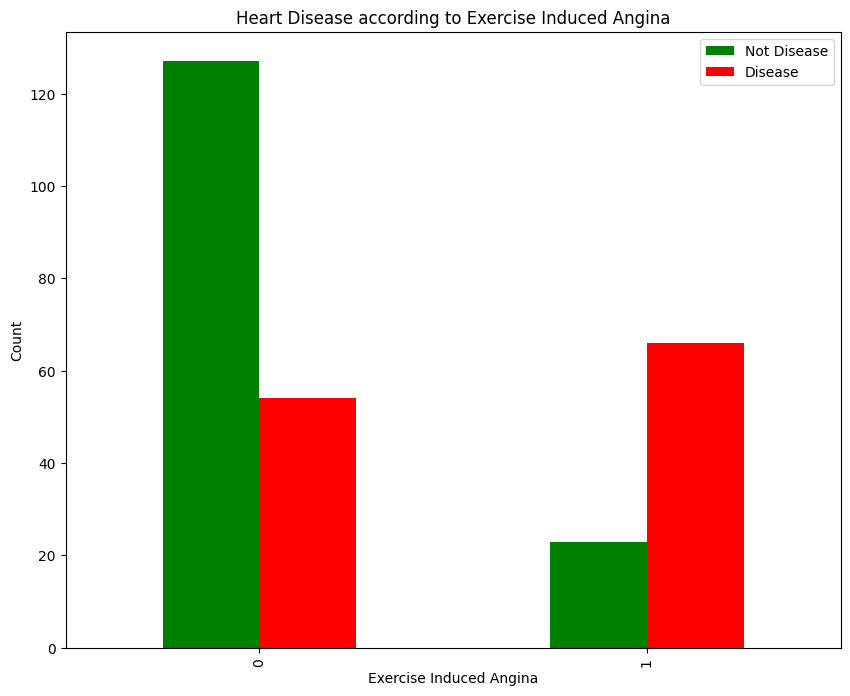

In [27]:
pd.crosstab(data_cleaned1["angina"], data_cleaned1["heart_disease"]).plot(kind="bar", figsize=(10,8), color=["green", "red"])
plt.title("Heart Disease according to Exercise Induced Angina")
plt.xlabel("Exercise Induced Angina")
plt.ylabel("Count")
plt.legend(["Not Disease", "Disease"])

## Findings

* Out of 89 patients having Exercise Induced Angina is 1 have heart disease in 66 patients.
* Out of 181 patients having Exercise Induced Angina is 0 have heart disease in 54 patients.

Text(0, 0.5, 'Frequency')

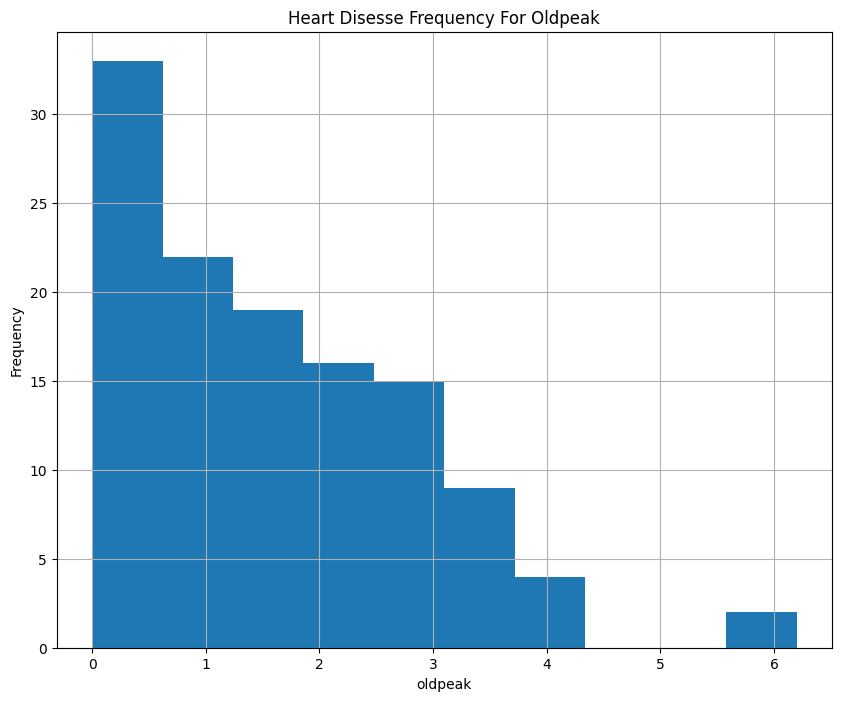

In [28]:
# oldpeak Vs Heart disease
plt.figure(figsize=(10,8))
data_cleaned1[data_cleaned1["heart_disease"] == 2]["oldpeak"].hist()
plt.title("Heart Disesse Frequency For Oldpeak")
plt.xlabel("oldpeak")
plt.ylabel("Frequency")

## Findings

> Lower oldpeak causes heart disease most.

In [29]:
# ST Segment Vs Heart Disease
pd.crosstab(data_cleaned1["st_segment"], data_cleaned1["heart_disease"])

heart_disease,1,2
st_segment,,
1,98,32
2,44,78
3,8,10


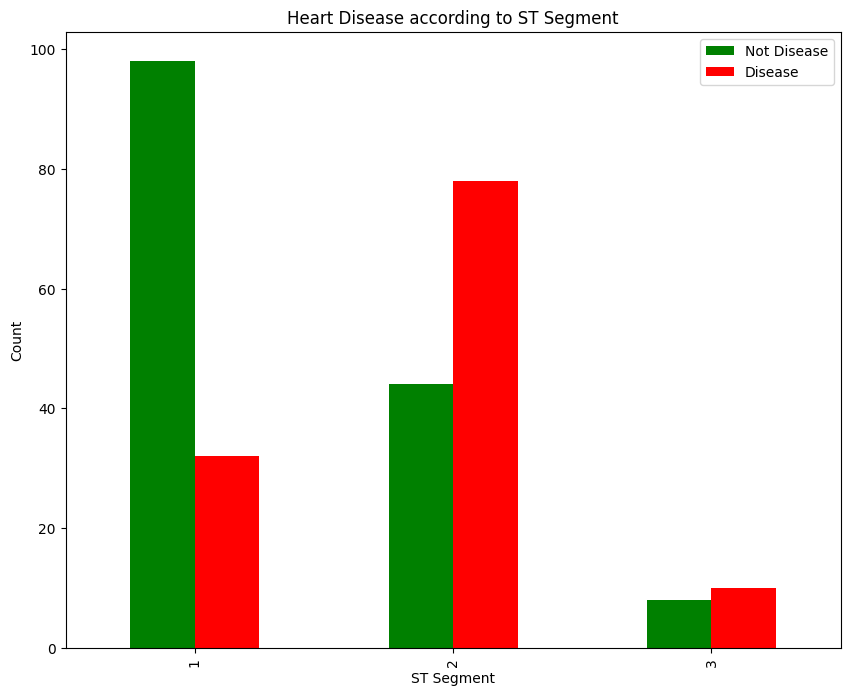

In [30]:
pd.crosstab(data_cleaned1["st_segment"], data_cleaned1["heart_disease"]).plot(kind="bar", figsize=(10,8), color=["green", "red"])
plt.title("Heart Disease according to ST Segment")
plt.xlabel("ST Segment")
plt.ylabel("Count")
plt.legend(["Not Disease", "Disease"])

## Findings

> Percentage of heart disease is mostly found having ST Segment 2 and 3

In [31]:
# Major Vessels Vs Heart Disease
pd.crosstab(data_cleaned1["major_vessels"], data_cleaned1["heart_disease"])

heart_disease,1,2
major_vessels,,
0,120,40
1,20,38
2,7,26
3,3,16


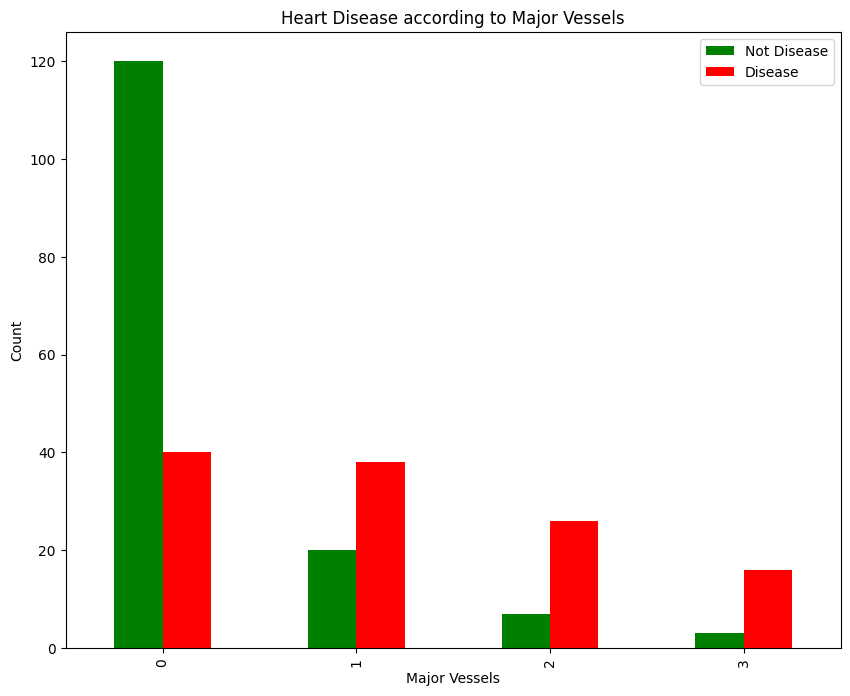

In [32]:
pd.crosstab(data_cleaned1["major_vessels"], data_cleaned1["heart_disease"]).plot(kind="bar", figsize=(10,8), color=["green", "red"])
plt.title("Heart Disease according to Major Vessels")
plt.xlabel("Major Vessels")
plt.ylabel("Count")
plt.legend(["Not Disease", "Disease"])

## Findings

> As the major vessels increase heart disease found most.

In [33]:
# Thal Vs Heart Disease
pd.crosstab(data_cleaned1["thal"], data_cleaned1["heart_disease"])

heart_disease,1,2
thal,,
3,119,33
6,6,8
7,25,79


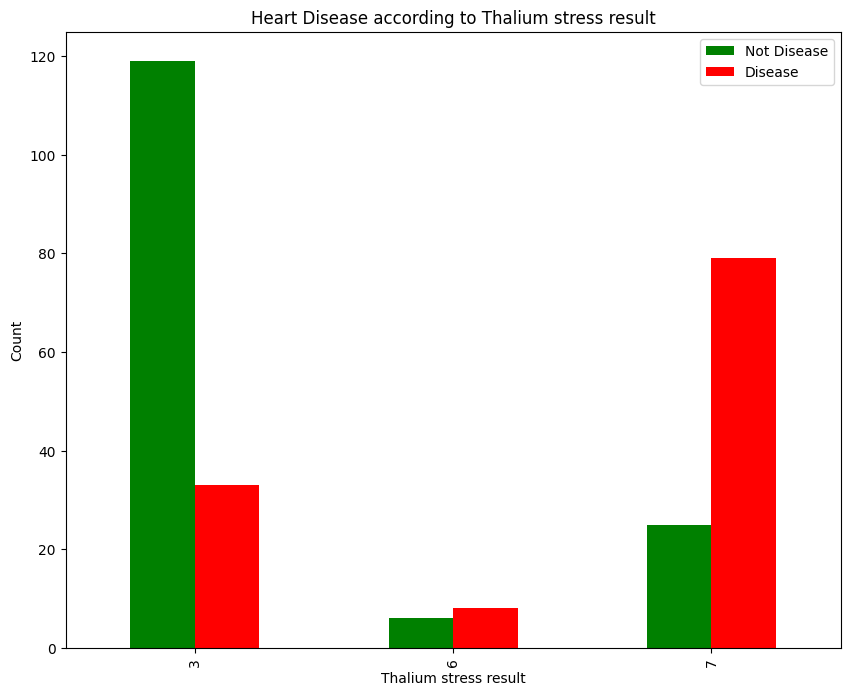

In [34]:
pd.crosstab(data_cleaned1["thal"], data_cleaned1["heart_disease"]).plot(kind="bar", figsize=(10,8), color=["green", "red"])
plt.title("Heart Disease according to Thalium stress result")
plt.xlabel("Thalium stress result")
plt.ylabel("Count")
plt.legend(["Not Disease", "Disease"])

## Findings

> Higher rate of thalium stress result causes heart disease most.

### Correlation Analysis

In [35]:
def check_correlation_between_2(df, feature1, feature2):
  corr = df[feature1].corr(df[feature2])
  strength = ''
  if ( corr >= 0.0 and corr <0.4) or (corr <= 0.0 and corr > -0.4):
    strength = "Weak"
  elif (corr >=0.4 and corr < 0.7) or (corr <= -0.4 and corr > -0.7):
    strength = "Modarate"
  elif (corr >=0.7 and corr <= 1.0) or (corr <= -0.7 and corr >= -1.0):
    strength = "Strong"
  print(f"Correlation between {feature1} and {feature2} is {corr:.2f}. The strength is {strength}.")
  # plt.figure(figsize=(10, 6))
  # sns.scatterplot(x=feature1, y=feature2, data=df, hue= feature2, palette="Set1", legend=["No Disease", "Disease"])
  # plt.xlabel(feature1)
  # plt.ylabel(feature2)
  # plt.title(f"Relation between {feature1} and {feature2}")
  # plt.legend(["No Disease", "Disease"])

## Findings

In [36]:
# Correlation between cholestoral and heart disease
check_correlation_between_2(data_cleaned1, "cholestoral", "heart_disease")

Correlation between cholestoral and heart_disease is 0.12. The strength is Weak.


In [37]:
# Check correlation between age and heart disease
check_correlation_between_2(data_cleaned1, 'age', 'heart_disease')

Correlation between age and heart_disease is 0.21. The strength is Weak.


In [38]:
for col in data_cleaned1.columns:
  if col != "heart_disease":
    check_correlation_between_2(data_cleaned1, col, "heart_disease")

Correlation between age and heart_disease is 0.21. The strength is Weak.
Correlation between sex and heart_disease is 0.30. The strength is Weak.
Correlation between chest_pain and heart_disease is 0.42. The strength is Modarate.
Correlation between resting_bp and heart_disease is 0.16. The strength is Weak.
Correlation between cholestoral and heart_disease is 0.12. The strength is Weak.
Correlation between sugar and heart_disease is -0.02. The strength is Weak.
Correlation between electrocardiographic and heart_disease is 0.18. The strength is Weak.
Correlation between max_heart_rate and heart_disease is -0.42. The strength is Modarate.
Correlation between angina and heart_disease is 0.42. The strength is Modarate.
Correlation between oldpeak and heart_disease is 0.42. The strength is Modarate.
Correlation between st_segment and heart_disease is 0.34. The strength is Weak.
Correlation between major_vessels and heart_disease is 0.46. The strength is Modarate.
Correlation between thal a

In [39]:
corr = data_cleaned1.corr()
corr

,age,sex,chest_pain,resting_bp,cholestoral,sugar,electrocardiographic,max_heart_rate,angina,oldpeak,st_segment,major_vessels,thal,heart_disease
age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100,0.212322
sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046,0.297721
chest_pain,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659,0.417436
resting_bp,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045,0.155383
cholestoral,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836,0.118021
sugar,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237,-0.016319
electrocardiographic,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337,0.182091
max_heart_rate,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397,-0.418514
angina,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449,0.419303
oldpeak,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333,0.417967


<Axes: >

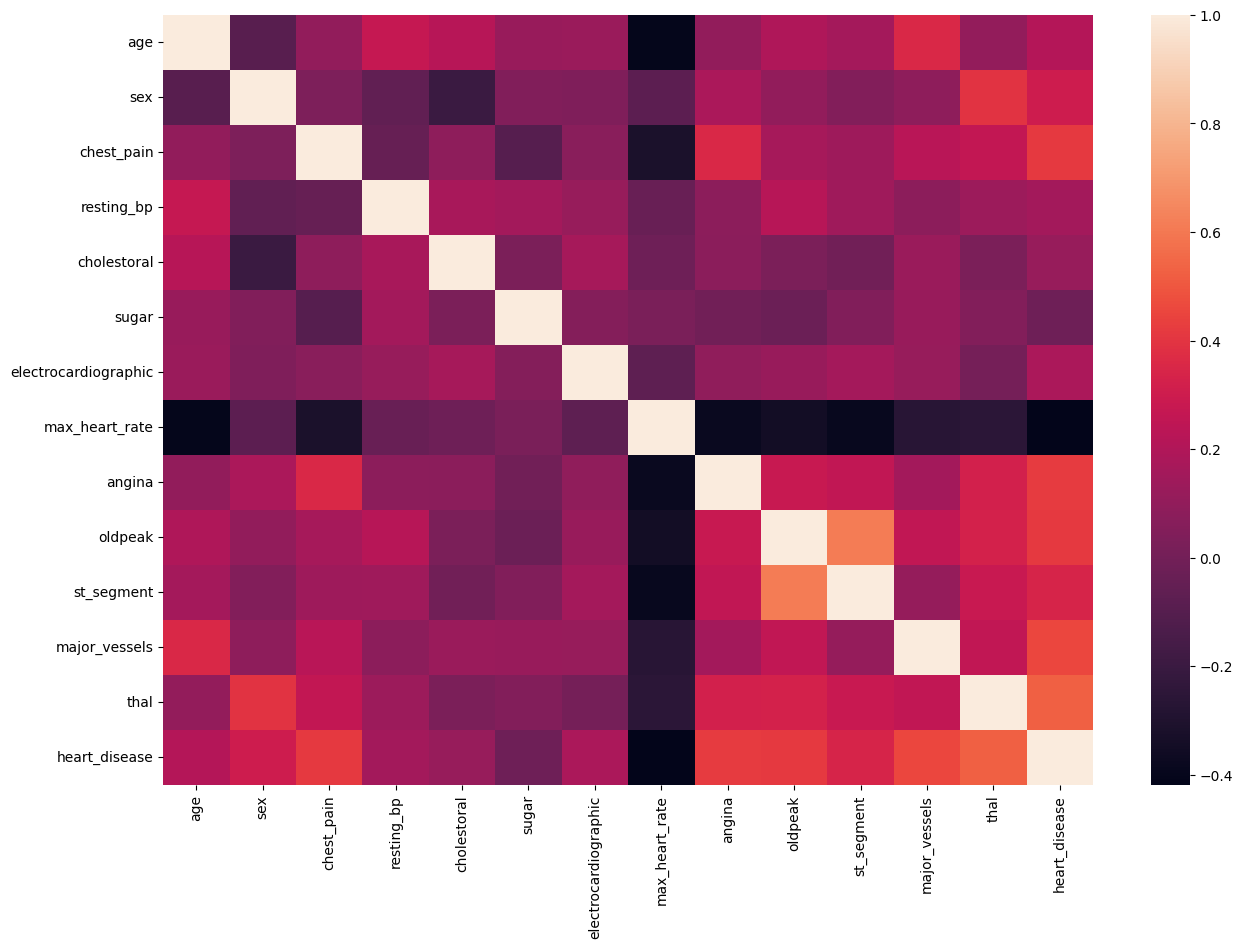

In [40]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr)

## Findings


In [51]:
rindex = 1

for row in corr.columns:
  cindex = 1
  for col in corr.columns:
    if row != col and cindex >= rindex:
      if corr[row][col] >=0.4 and corr[row][col]<0.7:
        print(f"{row} has a positive moderate correlation with {col}: {corr[row][col]:0.2f}\n")
      elif corr[row][col] <=-0.4 and corr[row][col]>=-0.7:
        print(f"{row} has a negative moderate correlation with {col}: {corr[row][col]:0.2f}\n")
      elif corr[row][col] >=0.7 and corr[row][col]<=1.0:
        print(f"{row} has a positive strong correlation with {col}: {corr[row][col]:0.2f}\n")
      elif corr[row][col] <=-0.7 and corr[row][col]>=-1.0:
        print(f"{row} has a negative strong correlation with {col}: {corr[row][col]:0.2f}\n")
    cindex +=1
  rindex += 1

age has a negative moderate correlation with max_heart_rate: -0.40

chest_pain has a positive moderate correlation with heart_disease: 0.42

max_heart_rate has a negative moderate correlation with heart_disease: -0.42

angina has a positive moderate correlation with heart_disease: 0.42

oldpeak has a positive moderate correlation with st_segment: 0.61

oldpeak has a positive moderate correlation with heart_disease: 0.42

major_vessels has a positive moderate correlation with heart_disease: 0.46

thal has a positive moderate correlation with heart_disease: 0.53



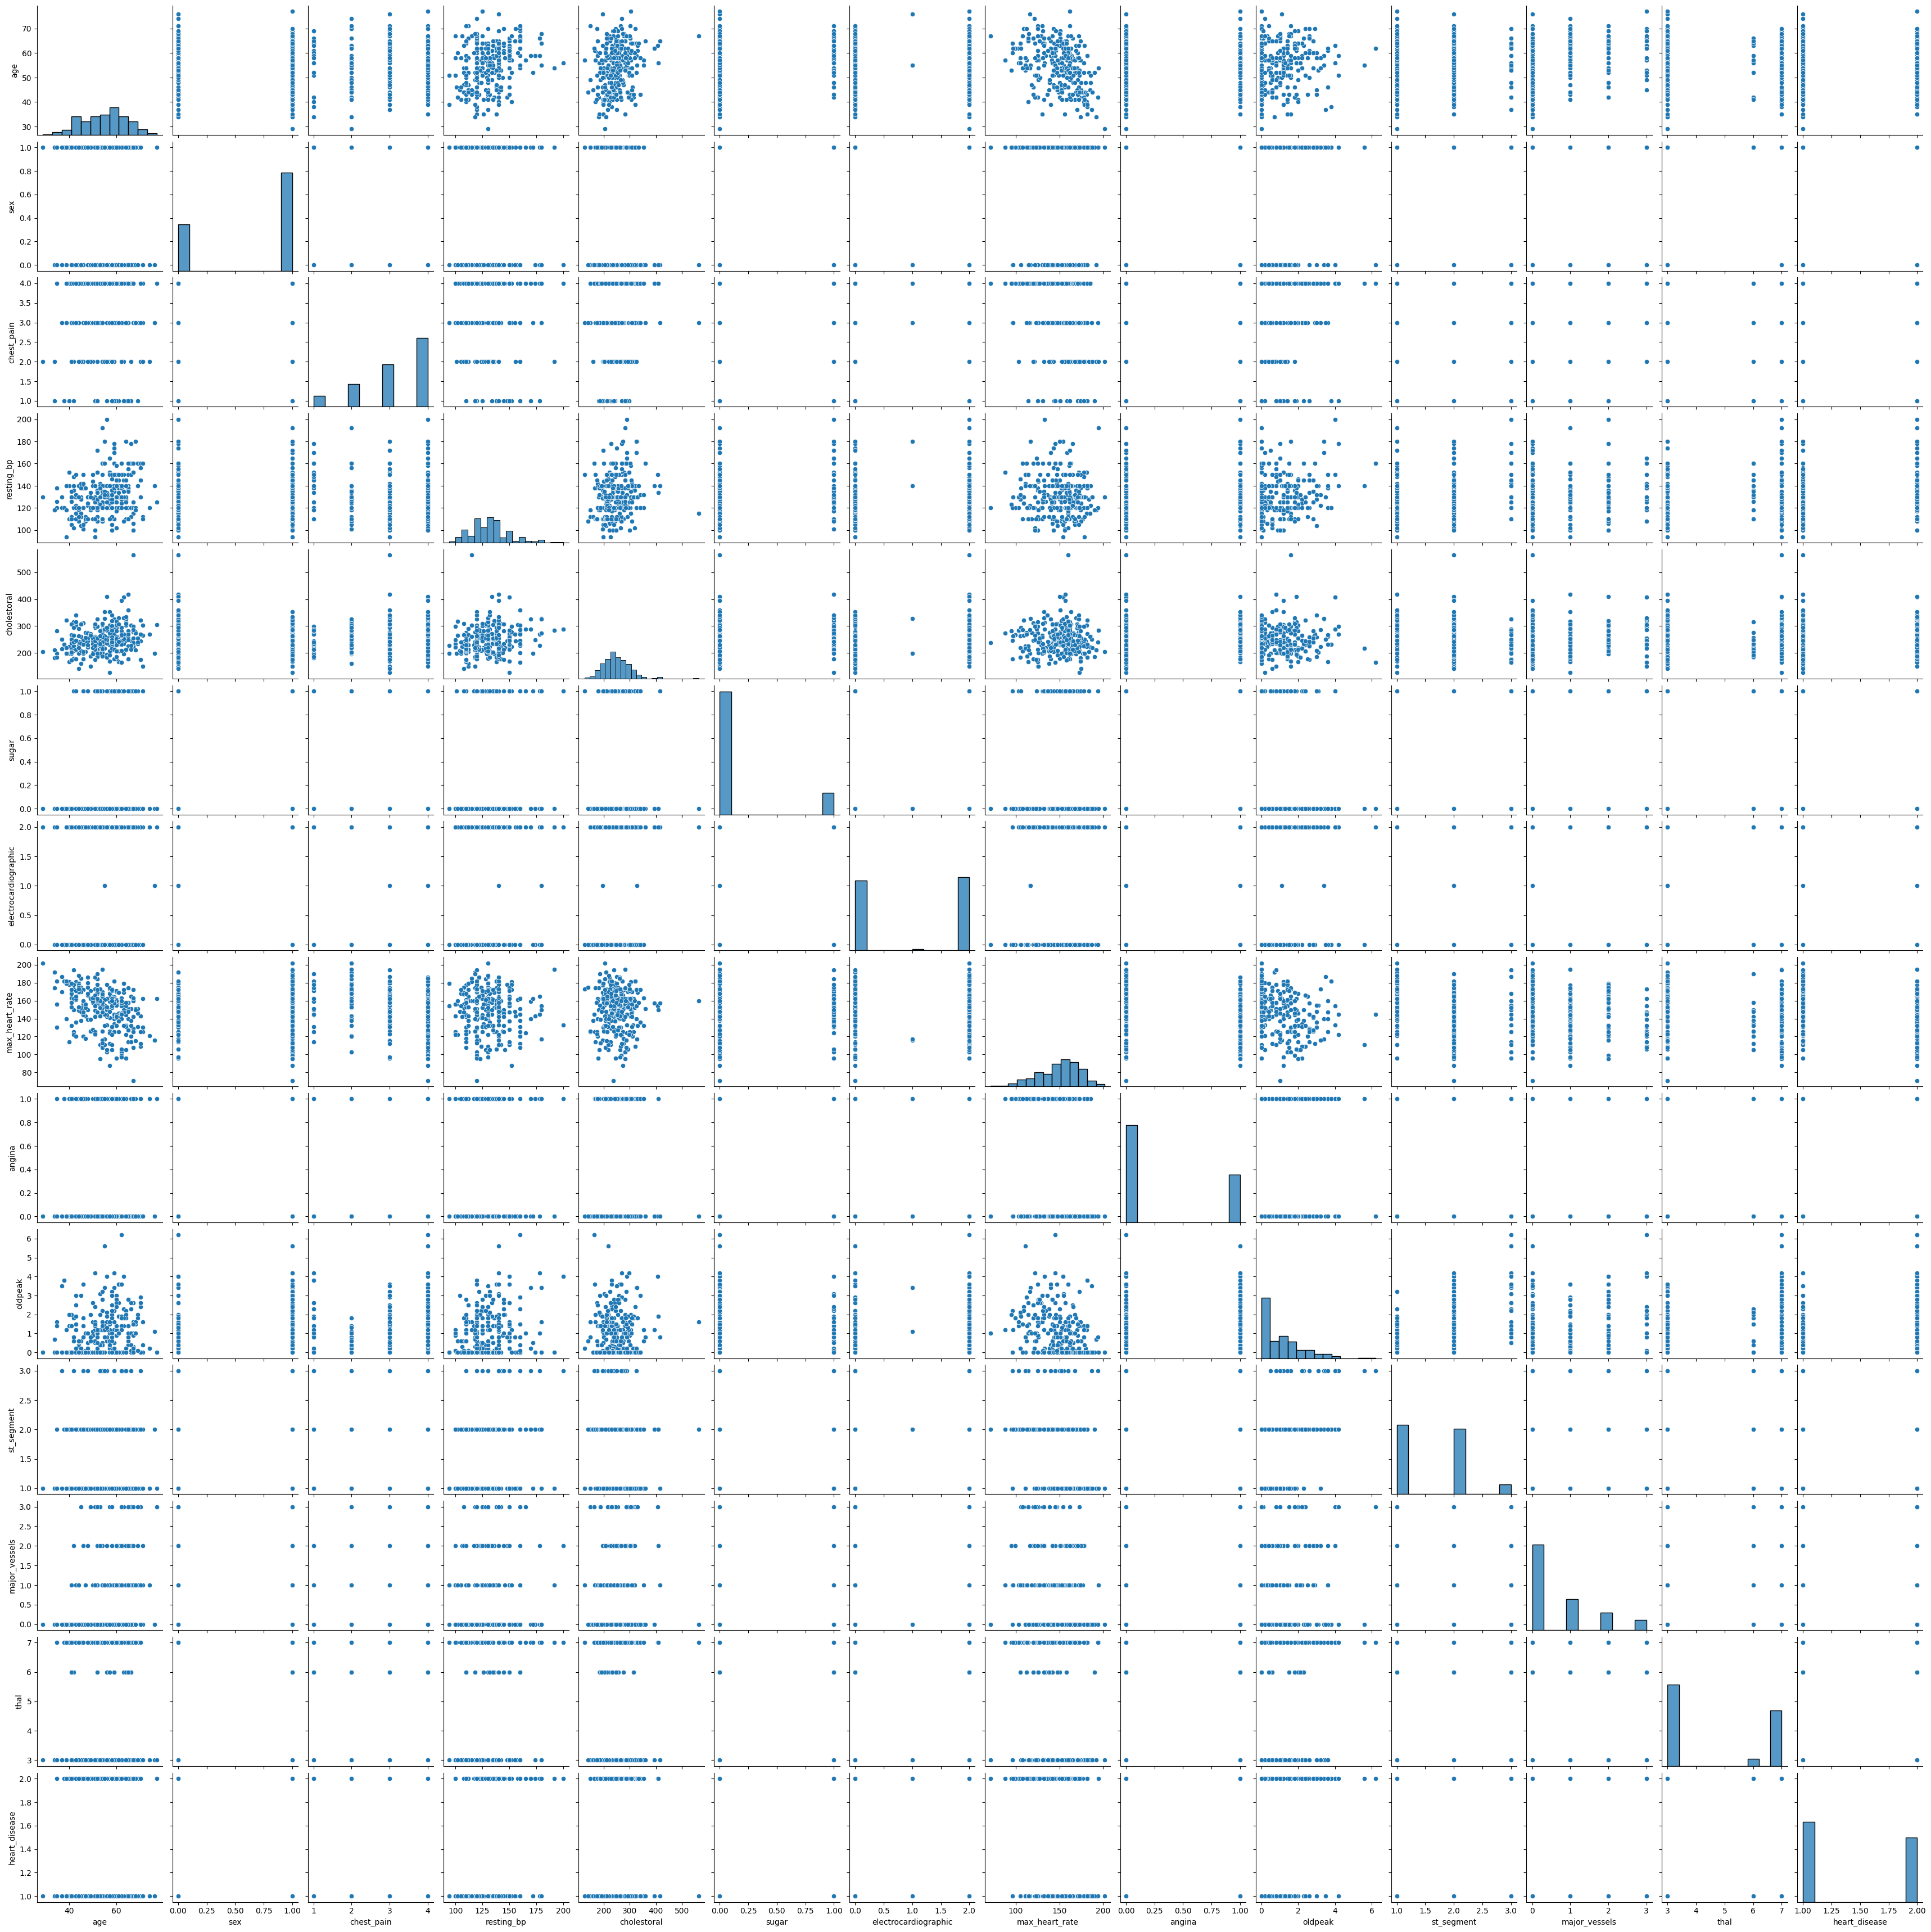

In [42]:
sns.pairplot(data_cleaned1)